In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
#from sympy.solvers import solve
#from sympy import Symbol
from scipy.interpolate import UnivariateSpline
# imports
#from constants import pdm_constants as const
#from config import config
#from pone_aeff import Aeff
#from dm2nu import DM2Nu
#from atm_shower import Atm_Shower
#from detectors import Detector
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

#from limit_calc import Limits
#from bkgrd_calc import Background
#from signal_calc import Signal
#from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
#from pone_aeff import Aeff
import pickle
from matplotlib import rc

import os
import shutil
def find_nearest(array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx
    PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot

h_length=1.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
color_km = '#1a9641'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

### galactic ###

In [2]:
energy_grid = np.logspace(1,5,51) #in GeV
m_chi= 1000 #in GeV
J_allsky=2.3e23 #from Carlos
sv=1e-25

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
def dNdE_nu(m_chi, E):
    tmp = np.zeros_like(E)
    # Since we work on a grid, the delta function is the closest val
    idE = find_nearest(E, m_chi) - 1
    tmp[idE] = 2 / E[idE]
    return tmp

In [5]:
#add different channel
bb = [6.505511089551874, 3.7673577794680906,
17.184538406949287, 0.4608870123818879,
43.39342981108686, 0.03179099695557441,
82.15700541676776, 0.004417344703140083,
139.70589556328096, 0.0011601553017399739,
200.3952533663909, 0.0003688249366560895,
284.4836104598413, 0.00012496091412919893,
368.5791539781353, 0.0000451209131433661,
460.47915487643854, 0.000017363262715527026,
567.9377655608556, 0.000004859996367971554,
676.8839661878712, 7.196856730011529e-7,
809.2507253797575, 1.3748295177747968e-7,
902.7101804690939, 5.290568041106863e-8,
957.1760943577582, 1.9103194204792716e-8,
982.0051921919495, 6.4723189062577304e-9,
998.9723412473837, 1.236419650215925e-9,
1006.395918110689, 4.51209131433661e-11]

tautau =[4.464566434006201, 0.05290568041106868,
21.474834038501285, 0.014808358247838268,
49.47314522866307, 0.007834462688727404,
85.29028664852095, 0.005017193252114605,
128.9046990235445, 0.003213012701596418,
169.40738944134532, 0.0021928747399631876,
216.16226947296556, 0.0016998662314736362,
259.805427547363, 0.0014043179200924883,
304.99366696310665, 0.0010214487701467323,
354.86745537679326, 0.0007918036720975034,
404.74124379047976, 0.0006137880562106195,
459.3221404766397, 0.0006137880562106195,
513.895850737956, 0.0005759286237751607,
568.4695609992724, 0.0005404044218966212,
679.1405035887208, 0.00034607522259998537,
774.2240906926816, 0.00023619564696696646,
855.2438443779698, 0.00012496091412919893,
923.7735916853063, 0.00005820723351294768,
995.4150609498657, 0.000025440752556199534]

E_log_grid=np.logspace(1, 5, 50)
dNdE_bb = UnivariateSpline(bb[0::2],bb[1::2], k=1, s=0, ext=1)
dNdE_tautau = UnivariateSpline(tautau[0::2],tautau[1::2], k=1, s=0, ext=1)

Text(0, 0.5, '$dN/dE$')

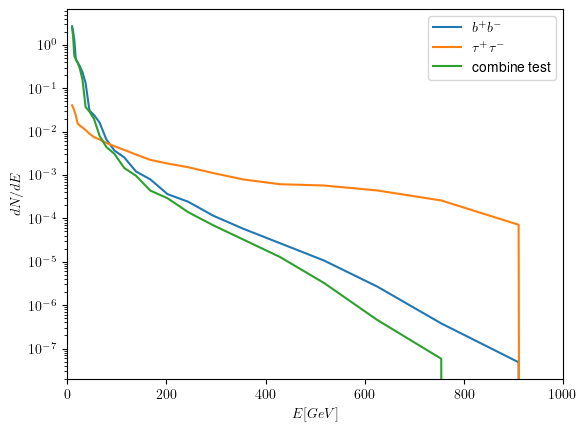

In [6]:
plt.plot(E_log_grid,dNdE_bb(E_log_grid),label=r'$b^+b^-$')
plt.plot(E_log_grid,dNdE_tautau(E_log_grid),label=r'$\tau^+ \tau^-$')
#channel spectrum equal combine of many delta function?
spectrum_sum=np.zeros(np.shape(E_log_grid))
for E in E_log_grid:
    single_spectrum = dNdE_nu(E,E_log_grid) * dNdE_bb(E) *E/2
    spectrum_sum += single_spectrum
plt.plot(E_log_grid,spectrum_sum,label=r'combine test')
plt.yscale('log')
plt.legend()
plt.xlim([0,1000])
plt.xlabel(r'$E[GeV]$')
plt.ylabel(r'$dN/dE$')

In [7]:
def NFW(r, rs=24.42, rhos=0.184, gamma=1):
    return rhos / ((r / rs) ** gamma * (1.0 + (r / rs)) ** (3 - gamma))

def Burkert(r, rs=12.67, rhos=0.712):
    return rhos / ((1.0 + r / rs) * (1.0 + r ** 2 / rs ** 2))

In [8]:
def J_theta(profile_function, theta_deg):
    # return jfactor with unit GeV^2/cm^5 for annihilation
    # theta: angle between the line of sight and axis connecting Earth and GC in radians
    theta = np.deg2rad(theta_deg)
    R_max = 200. #maximum of the line of sight in kpc 
    d_sun = 8.5 #distance earth to sun
    
    x = Symbol("x")
    solution = solve((x**2 + d_sun**2-R_max**2) / (2*x*d_sun) - np.cos(theta), x)
    l_max= float(max(solution))
    
    l = np.linspace(0.0, l_max, 101)
    width = np.diff(l) * 3.0857e21
    center = (l[1:] + l[:-1]) / 2.0
    r_GC = np.sqrt(d_sun**2 + center**2 - 2*d_sun*center*np.cos(theta))#distance between the location and GC
    densities = profile_function(r_GC)
    return sum(densities * densities * width)

theta_deg=np.linspace(0,90,101)
J_value_NFW=[J_theta(NFW,angle) for angle in theta_deg]
J_value_Burkert=[J_theta(Burkert,angle) for angle in theta_deg]
plt.plot(theta_deg,J_value_NFW,label=r'J$_{NFW}$')
plt.plot(theta_deg,J_value_Burkert,label=r'J$_{Burkert}$')
plt.yscale('log')
plt.xlim([0,90])
plt.legend(fontsize=15)
plt.xlabel(r'$\theta^{\circ}$', fontsize=15)
plt.ylabel(r'$J(\theta)$', fontsize=15)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17241/2794162801.py", line 20, in <cell line: 20>
    J_value_NFW=[J_theta(NFW,angle) for angle in theta_deg]
  File "/tmp/ipykernel_17241/2794162801.py", line 20, in <listcomp>
    J_value_NFW=[J_theta(NFW,angle) for angle in theta_deg]
  File "/tmp/ipykernel_17241/2794162801.py", line 8, in J_theta
    x = Symbol("x")
NameError: name 'Symbol' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7f84a4432760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/inte

In [9]:
def galactic_flux(E, m_chi, sv):
        """ Fetches the galactic flux
        E : Energy Grid
        m_x : Dark Matter mass
        sv : signma_nu
        k : k factor (majorana: 2 otherwise 4)
        J : J-factor
        """
        k=2
        return (1 / (4 * np.pi)) * (sv / (3 * k * m_chi**2)) * dNdE_nu(m_chi, E)* J_allsky
    
def galactic_flux_channel(E, m_chi, sv, channel_spectrum):
    k=2
    return (1 / (4 * np.pi)) * (sv / (3 * k * m_chi**2)) * channel_spectrum(E)* J_allsky

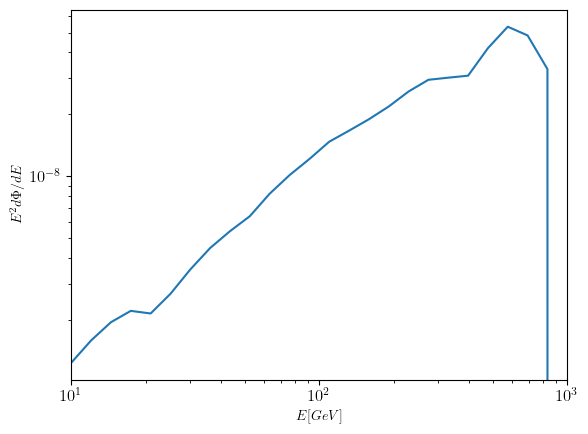

In [10]:
flux=galactic_flux_channel(energy_grid,m_chi,sv,dNdE_tautau)
plt.plot(energy_grid,flux*(energy_grid**2))
plt.xscale("log")
plt.yscale("log")
plt.xlim([10,1000])
plt.xlabel(r'$E[GeV]$')
plt.ylabel(r'$E^2 d\Phi/dE$')
plt.tick_params(axis='both', which='major', labelsize=12)

### extra-galactic ###

In [11]:
omega_m=0.25
omega_L=0.75
omega_r=4.75e-5
omega_dm = 0.23
h=0.67
H_0= 70/3.086e19
rho_c=1.053e-5 * h**2 #GeV/cm^3
massOfSun_grid=np.logspace(-9, 17, 151)

In [12]:
def a_z(z):
    return 1 / (1+z)

In [13]:
def H_z(z):
    a=a_z(z)
    H_0= 70/3.086e19 #km/s/Mpc->
    return H_0* ((omega_m/a**3) + omega_L)**(1/2)

In [14]:
def omega_mz(z):
    a = a_z(z)
    return  (omega_m/a**3) / (omega_L + omega_m/a**3 )

In [15]:
def omega_Lz(z):
    a = a_z(z)
    return  (omega_L) / (omega_L + omega_m/a**3)

### lopez parametrization ###

In [16]:
def D_prada(z):
    a=a_z(z)
    x_values=(omega_L/omega_m)**(1/3) * a_z(z)
    D_result=[]
    if isinstance(x_values,float):
        x=x_values
        prefactor = np.sqrt(1+x**3)/x**(3/2)
        D= lambda x: x**(3/2)/(1+x**3)**(3/2)
        x_int = integrate.quad(D,0, x)
        result = (5/2)*(omega_L/omega_m)**(1/3)*prefactor* x_int[0]
        D_result.append(result)
    elif len(x_values)>= 1:
        for x in x_values:
            prefactor = np.sqrt(1+x**3)/x**(3/2)
            D= lambda x: x**(3/2)/(1+x**3)**(3/2)
            x_int = integrate.quad(D,0, x)
            result = (5/2)*(omega_L/omega_m)**(1/3)*prefactor* x_int[0]
            D_result.append(result)
    else:
        print('error!')
    return np.array(D_result)

In [17]:
def D_lopez(z):
    return (5/2)*omega_mz(z) / (omega_mz(z)**(4/7)-omega_Lz(z)+(1+omega_mz(z)/2)*(1+omega_Lz(z)/70)) /(1+z)

In [18]:
#D_lopez(1),D_prada(1)

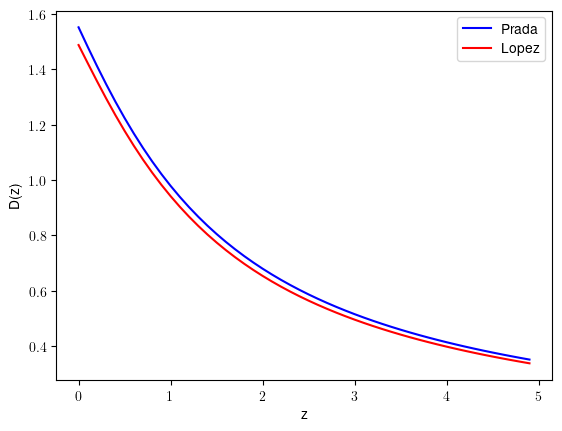

In [19]:
z_grid=np.arange(0,5,0.1)
plt.plot(z_grid,D_prada(z_grid),'b-',label="Prada")
plt.plot(z_grid,D_lopez(z_grid)*2,'r-',label="Lopez")
plt.xlabel('z')
plt.ylabel('D(z)')
plt.legend()
plt.savefig('Dz', dpi=250)

In [20]:
#lopez eq.B15 convert M 10^[-9,17]
def sigma_lopez(M):
    return np.exp((2.6 * M**(0.001745)) - 0.2506 * M**0.07536)

#lopez eq.B15
def ln_inv_sigma_lopez(M):
    return 2.6 * M**0.001745 - 0.2506 * M**0.07536

In [21]:
#prada eq.23, M 10^[10-15]
def sigma_prada(M):
    y = (M*h/1e12)**(-1)
    return 16.9*(y**0.41)/(1 + 1.102*(y**0.2) + 6.22*(y**0.333))

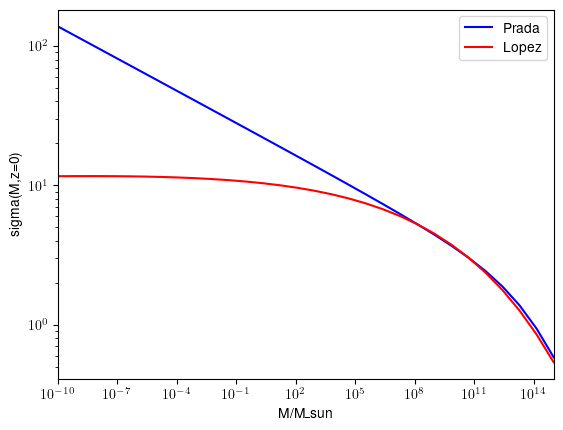

In [22]:
massOfSun_grid=np.logspace(-10, 15, 30)
plt.plot(massOfSun_grid,sigma_prada(massOfSun_grid),'b-',label="Prada")
plt.plot(massOfSun_grid,sigma_lopez(massOfSun_grid),'r-',label="Lopez")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M/M_sun')
plt.ylabel('sigma(M,z=0)')
plt.xlim([1e-10,1e15])
#plt.ylim([1e-1,1e1])
plt.legend()
plt.savefig('sigma', dpi=250)

In [23]:
#c_200 and lnsigma(z=0) comparison of lopez/prada/ibarra

In [24]:
def c_200_prada(M,z):
    return B_0(z)*C_sigma_quote_prada(M,z)

def c_200_lopez(M,z):
    return B_0(z)*C_sigma_quote_lopez(M,z)

In [25]:
def C_sigma_quote_prada(M,z):
    quote = sigma_quote_prada(M,z)
    A = 2.881
    b = 1.257
    c = 1.022
    d = 0.060
    return A * ((quote / b)**c + 1) * np.exp(d / quote**2)

def C_sigma_quote_lopez(M,z):
    quote = sigma_quote_lopez(M,z)
    A = 2.881
    b = 1.257
    c = 1.022
    d = 0.060
    return A * ((quote / b)**c + 1) * np.exp(d / quote**2)

In [26]:
def sigma_quote_lopez(M,z):
    return B_1(z)*sigma_final_lopez(M,z)

def sigma_final_lopez(M,z):
    return sigma_lopez(M)*D_lopez(z)/D_lopez(0)

In [27]:
def sigma_quote_prada(M,z):
    return B_1(z)*sigma_final_prada(M,z)

def sigma_final_prada(M,z):
    return sigma_prada(M)*D_prada(z)

In [28]:
def sigma_inv_min(x):
    sigma_inv_0 = 1.047
    sigma_inv_1 = 1.646
    beta = 7.386
    x_1 = 0.526
    return sigma_inv_0 + (sigma_inv_1 - sigma_inv_0) * ((np.arctan(beta * (x - x_1)) / np.pi) + (1/2))

def B_1(z):
    a=a_z(z)
    x=(omega_L/omega_m)**(1/3) * a_z(z)
    return sigma_inv_min(x)/sigma_inv_min(1.393)

In [29]:
def c_min(x):
    c0 = 3.681
    c1 = 5.033
    alpha = 6.948
    x_0 = 0.424
    return c0 + (c1 - c0) * ((np.arctan(alpha * (x - x_0)) / np.pi) + (1/2))

def B_0(z):
    a=a_z(z)
    x=(omega_L/omega_m)**(1/3) * a_z(z)
    return c_min(x)/c_min(1.393)

In [30]:
def ln_sigma_inv_lopez(M):
    return 0.2506 * M**(0.07536) - 2.6 * M**0.001745

In [31]:
def ln_sigma_inv_prada(M):
    return np.log((sigma_final_prada(M,z=0))**(-1))

In [32]:
#ibarra c
#conservative estimation between M_200 mas and M_vir mass
def c_ibarra(M_vir,z,M_to_Mvir=1.2):
    w =0.029
    m =0.097
    a = w*z-m
    alpha= -110.001
    beta=2469.720
    gamma=16.885
    b = alpha/(z+gamma)+beta/(z+gamma)**2
    M_200_grid = M_vir #*M_to_Mvir
    return 10**(a*np.log10(M_200_grid*h)+b)

In [33]:
#multidark c,look into table, only test z=0 case
def c_200_multidark(M,z):
    z=0
    C_0=7.40
    gamma=0.120
    M_0=5.5e12 * 1e12/ h #include mass of sun
    return C_0 *(M*h/1e12)**(-gamma)*(1+(M/M_0)**0.4)

### compare c(M,z)-M relationship ###

In [34]:
#for later vector multiplication, the two array must have same length
massOfSun_grid=np.logspace(-10, 16, 42)
z_grid=np.linspace(0,5,42)

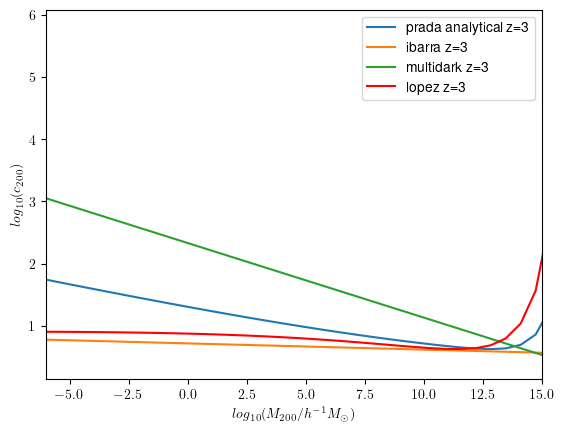

In [35]:
z_0_grid=np.linspace(0,0,42)
z_1_grid=np.linspace(1,1,42)
z_2_grid=np.linspace(2,2,42)
z_3_grid=np.linspace(3,3,42)
#plt.plot(ln_sigma_inv_lopez(massOfSun_grid),c_200(massOfSun_grid,z_zero_grid,sigma_quote_lopez),'b-',label='lopez')
#plt.plot(ln_sigma_inv_prada(massOfSun_grid),c_200(massOfSun_grid,z_zero_grid,sigma_quote_prada),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_0_grid),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_1_grid),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_2_grid),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_3_grid),'r-',label='prada')
#plt.plot(massOfSun_grid,ln_sigma_inv_prada(massOfSun_grid),'r-',label='prada')
plt.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_3_grid)),'-',label='prada analytical z=3')
#plt.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_1_grid)),'-',label='prada z=1')
#plt.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_2_grid)),'-',label='prada z=2')
#plt.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_3_grid)),'-',label='prada z=3')
plt.plot(np.log10(massOfSun_grid),np.log10(c_ibarra(massOfSun_grid,z_3_grid)),'-',label='ibarra z=3')
plt.plot(np.log10(massOfSun_grid),np.log10(c_200_multidark(massOfSun_grid,z_3_grid)),'-',label='multidark z=3')
plt.plot(np.log10(massOfSun_grid),np.log10(c_200_lopez(massOfSun_grid,z_3_grid)),'r-',label='lopez z=3')
plt.xlabel(r'$log_{10} (M_{200}/h^{-1} M_\odot)$')
plt.ylabel(r'$log_{10}(c_{200})$')
plt.xlim([-6,15])
#plt.ylim([0.5,1.2])
plt.legend()
plt.savefig('c200', dpi=250)

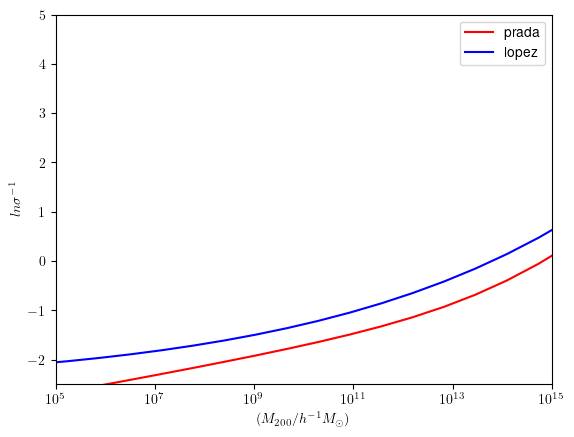

In [36]:
plt.plot(massOfSun_grid,ln_sigma_inv_prada(massOfSun_grid),'r-',label='prada')
plt.plot(massOfSun_grid,ln_sigma_inv_lopez(massOfSun_grid),'b-',label='lopez')
plt.xlabel(r'$(M_{200}/h^{-1} M_\odot)$')
plt.ylabel(r'$ln \sigma^{-1}$')
plt.xscale('log')
plt.xlim([1e5,1e15])
plt.ylim([-2.5,5])
plt.legend()
plt.savefig('log(Sig)', dpi=250)

In [37]:
def g_tild(M,z,c_200_function):
    c_200=c_200_function(M,z)
    return ((c_200**3) * (1 - (1 + c_200)**(-3))) / (3 * (np.log(1 + c_200) - c_200 * (1 + c_200)**(-1))**2)

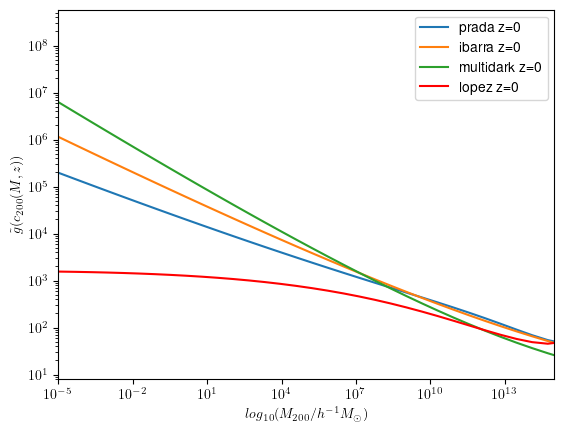

In [38]:
z_0_grid=np.linspace(0,0,42)
z_1_grid=np.linspace(1,1,42)
z_2_grid=np.linspace(2,2,42)
z_3_grid=np.linspace(3,3,42)
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_200_prada),'-',label='prada z=0')
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_ibarra),'-',label='ibarra z=0')
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_200_multidark),'-',label='multidark z=0')
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_200_lopez),'r-',label='lopez z=0')
plt.xlabel(r'$log_{10} (M_{200}/h^{-1} M_\odot)$')
plt.ylabel(r'$\tilde{g}(c_{200}(M,z))$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-5,1e15])
#plt.ylim([0, 0.5e8])
plt.legend()
plt.savefig('gtilde', dpi=250)

In [39]:
def f_178(sigma_function,M,z):
    sigma=sigma_function(M,z)
    A = omega_mz(z)*(1.097*(1+z)**(-3.216) + 0.074)
    alpha = omega_mz(z)*(5.907*(1+z)**(-3.599) + 2.344)
    beta = omega_mz(z)*(3.136*(1+z)**(-3.068) + 2.349)
    gamma = 1.318
    
    return A * ((sigma / beta)**(-alpha) + 1) * np.exp(-gamma / sigma**2)

In [40]:
def f_delta(sigma_function,M,z):
    delta=200
    sigma=sigma_function(M,z)
    return (np.exp(((delta / 178) - 1) * (0.023 - (0.072 / sigma**2.13))) *
            (delta / 178)**(-0.456 *omega_mz(z) - 0.139))* f_178(sigma_function,M,z)

In [41]:
def f_ST(sigma_function,M,z):
    a=0.75
    delta_c=1.686
    p=0.3
    sigma=sigma_function(M,z)
    return 0.3222*np.sqrt(2*a/np.pi)*(delta_c/sigma)*np.exp(-a*delta_c**2/(2*sigma**2))* ((1+sigma**2/(a*delta_c**2))**p)

def f_Warren(sigma_function,M,z):
    sigma=sigma_function(M,z)
    return 0.7234*(sigma**(-1.625) + 0.2538)*np.exp(-1.1982/sigma**2)

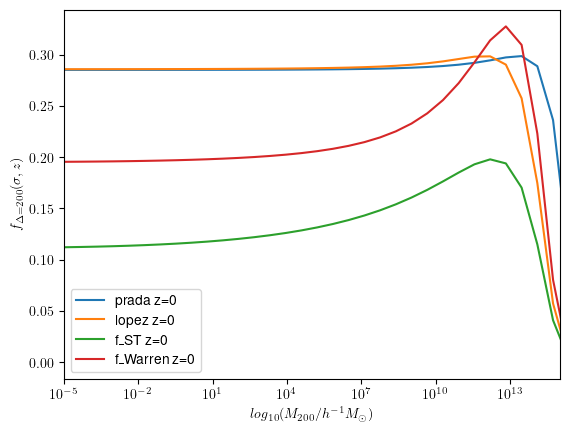

In [42]:
z_0_grid=np.linspace(0,0,42)
z_1_grid=np.linspace(1,1,42)
z_2_grid=np.linspace(2,2,42)
z_3_grid=np.linspace(3,3,42)
plt.plot(massOfSun_grid,f_delta(sigma_final_prada,massOfSun_grid,z_0_grid),'-',label='prada z=0')
plt.plot(massOfSun_grid,f_delta(sigma_final_lopez,massOfSun_grid,z_0_grid),'-',label='lopez z=0')
plt.plot(massOfSun_grid,f_ST(sigma_final_lopez,massOfSun_grid,z_0_grid),'-',label='f_ST z=0')
plt.plot(massOfSun_grid,f_Warren(sigma_final_lopez,massOfSun_grid,z_0_grid),'-',label='f_Warren z=0')
plt.xlabel(r'$log_{10} (M_{200}/h^{-1} M_\odot)$')
plt.ylabel(r'$f_{\Delta=200}(\sigma,z)$')
plt.xscale('log')
#plt.yscale('log')
plt.xlim([1e-5,1e15])
#plt.ylim([0, 0.5e8])
plt.legend()
plt.savefig('fDelta', dpi=250)

### compare $ln(\sigma^-1)$ and final integral of extragalactic flux ###

In [43]:
def dln_inv_dlogM_lopez(M):
    return 0.2506 * 0.07536 * (M)**(0.07536 - 1) - 2.6 * 0.001745 * (M)**(0.001745 - 1)

def dln_inv_dlogM_prada(M): # change the results --- 
    y = (M * h / (1e12 ))**(-1)
    dln_sigma_inv_dy = -(0.0372058*(y**1.997+10.9392*y**1.8+1.77167*y**1.797))/((y**0.003+0.17717*y**0.2+0.160772)*y**2.797)
    dy_dm = -y/M
    dln_sigma_inv_dm = dln_sigma_inv_dy * dy_dm
    return dln_sigma_inv_dm

In [44]:
M=np.logspace(-9, 15, 42)
z=np.linspace(0,20,101)
def G_lopez(z):
    delta=200
    lopez_int_grid=np.logspace(-5, 16, 42)
    def integrand(M):
        return dln_inv_dlogM_lopez(M) * f_delta(sigma_final_lopez,M,z) * g_tild(M, z,c_200_lopez)
    prefactor = ((omega_m/omega_dm)**2) * (delta/(3*omega_m/a_z(z)**3))
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
    int_values = np.trapz(to_int_values, x=lopez_int_grid,axis=0)
    return prefactor*int_values

def G_prada(z):
    delta=200
    lopez_int_grid=np.logspace(-5, 16, 42)
    def integrand(M):
        return dln_inv_dlogM_prada(M) * f_delta(sigma_final_prada,M,z) * g_tild(M, z,c_200_prada)
    prefactor = ((omega_m/omega_dm)**2) * (delta/(3*omega_m/a_z(z)**3))
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
    int_values = np.trapz(to_int_values, x=lopez_int_grid,axis=0)
    
    return prefactor*int_values

def G_ibarra(z):
    delta=200
    lopez_int_grid=np.logspace(-9, 17, 151)
    def integrand(M):
        return dln_inv_dlogM_prada(M) * f_delta(sigma_final_prada,M,z) * g_tild(M, z,c_ibarra)
    prefactor = ((omega_m/omega_dm)**2) * (delta/(3*omega_m/a_z(z)**3))
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
    int_values = np.trapz(to_int_values, x=lopez_int_grid,axis=0)
    
    return prefactor*int_values

/tmp/ipykernel_17241/1090215601.py:3: RuntimeWarning: overflow encountered in power
  return ((c_200**3) * (1 - (1 + c_200)**(-3))) / (3 * (np.log(1 + c_200) - c_200 * (1 + c_200)**(-1))**2)
/tmp/ipykernel_17241/1884118622.py:7: RuntimeWarning: invalid value encountered in multiply
  return dln_inv_dlogM_lopez(M) * f_delta(sigma_final_lopez,M,z) * g_tild(M, z,c_200_lopez)


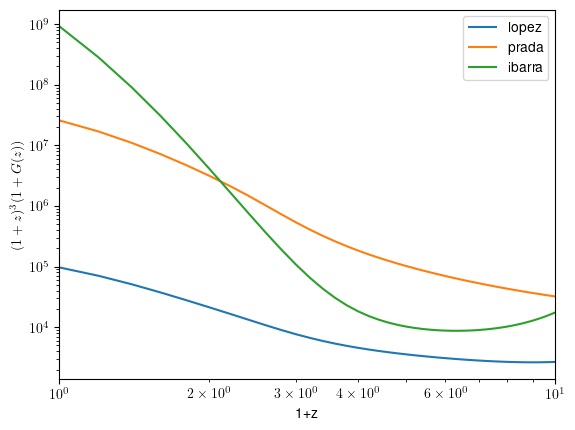

In [45]:
plt.plot((1+z),(1+G_lopez(z))*(1+z)**3,label='lopez')
plt.plot((1+z),(1+G_prada(z))*(1+z)**3,label='prada')
plt.plot((1+z),G_ibarra(z)*(1+z)**3,label='ibarra')
plt.legend()
plt.xlabel('1+z')
plt.ylabel(r'$(1+z)^3 (1+G(z))$')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1, 1e1])
plt.legend()
plt.savefig("G_integrand", dpi=250)

In [46]:
def dPhidE_extra(E, m_x, sv, G_function):
    #use integral formula from Carlos' paper
    z = m_x / E - 1  # To apply the delta function integral
    z_tmp = z[z > 0]

    Cosmos = (1 + G_function(z_tmp)) *(1 + z_tmp**3)/H_z(z_tmp)
    Physics = sv * (omega_dm * rho_c) ** 2
    factor = 8 * np.pi * m_x**2
    
    res = 2* Cosmos * Physics /(3*E[E<m_x]*factor)
    
    result = np.zeros_like(E)
    result[0:len(res)] = res
    
    return result
#try different method

In [47]:
def dPhidE_extra_2(E, m_x, sv, G_function):
    #use the integral formula from second reference paper
    
    z = m_x / E - 1  # To apply the delta function integral
    E_1= E*(1+z)
    z_tmp = z[z > 0]

    Cosmos = G_function(z_tmp)/H_z(z_tmp)
    Physics = sv * (rho_c*omega_m)**2/m_x**2/2
    
    res=Cosmos*Physics/ (E_1[E<m_x])
    
    result = np.zeros_like(E)
    result[0:len(res)] = res
    
#     z_grid=np.linspace(0,5,100)
#     E_1= E*(1+z_grid)
#     dNdE = dNdE_nu(m_x,E_1)
#     boost_int = np.trapz(dNdE*G_function(z_grid)/H_z(z_grid))
#     Physics = sv * (rho_c*omega_m)**2/m_x**2/2
#     result=Physics*boost_int
    
    return result

In [48]:
def dPhidE_extra_channel(E, m_x, sv, G_function, channel_spectrum):
    z_grid=np.linspace(0,5,100)
    E_1 = E*(1+z_grid)
    dNdE = channel_spectrum(E_1)
    boost_int = np.trapz(dNdE*G_function(z_grid)/H_z(z_grid))
    Physics = sv * (rho_c*omega_m)**2/m_x**2/2
    result = Physics*boost_int
    
    return result

In [49]:
dNdE_tautau(100)

array(0.0044087)

In [50]:
m_x / 10 - 1

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17241/1466764138.py", line 1, in <cell line: 1>
    m_x / 10 - 1
NameError: name 'm_x' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7f84a4432760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 140207668275040, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py

/tmp/ipykernel_17241/1090215601.py:3: RuntimeWarning: overflow encountered in power
  return ((c_200**3) * (1 - (1 + c_200)**(-3))) / (3 * (np.log(1 + c_200) - c_200 * (1 + c_200)**(-1))**2)
/tmp/ipykernel_17241/1884118622.py:7: RuntimeWarning: invalid value encountered in multiply
  return dln_inv_dlogM_lopez(M) * f_delta(sigma_final_lopez,M,z) * g_tild(M, z,c_200_lopez)
/tmp/ipykernel_17241/2075404716.py:15: RuntimeWarning: overflow encountered in exp
  return A * ((quote / b)**c + 1) * np.exp(d / quote**2)
/tmp/ipykernel_17241/1090215601.py:3: RuntimeWarning: invalid value encountered in multiply
  return ((c_200**3) * (1 - (1 + c_200)**(-3))) / (3 * (np.log(1 + c_200) - c_200 * (1 + c_200)**(-1))**2)
/tmp/ipykernel_17241/2075404716.py:15: RuntimeWarning: overflow encountered in multiply
  return A * ((quote / b)**c + 1) * np.exp(d / quote**2)
/tmp/ipykernel_17241/1884118622.py:17: RuntimeWarning: invalid value encountered in multiply
  return dln_inv_dlogM_prada(M) * f_delta(sigma_

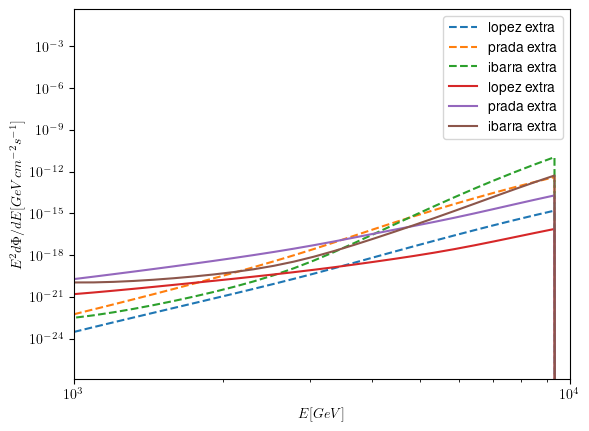

In [51]:
sv=1e-24
m_x=10000
E_bins = np.logspace(1, 5, 100)
E_log_grid = np.sqrt(E_bins[:-1] * E_bins[1:])
E_widths = (E_bins[1:] - E_bins[:-1])

# plt.plot(E_log_grid,dPhidE_extra_channel(E_log_grid,m_x,sv,G_lopez,dNdE_tautau)*(E_log_grid**0),label='lopez extra')
# plt.plot(E_log_grid,dPhidE_extra_channel(E_log_grid,m_x,sv,G_prada,dNdE_tautau)*(E_log_grid**0),label='prada extra')
# plt.plot(E_log_grid,dPhidE_extra_channel(E_log_grid,m_x,sv,G_ibarra,dNdE_tautau)*(E_log_grid**0),label='ibarra extra')
plt.plot(
    E_log_grid,dPhidE_extra_2(E_log_grid,m_x,sv,G_lopez) * E_widths *
    (E_log_grid**2),label='lopez extra', ls='--')
plt.plot(
    E_log_grid,dPhidE_extra_2(E_log_grid,m_x,sv,G_prada) * E_widths *
    (E_log_grid**2),label='prada extra', ls='--')
plt.plot(
    E_log_grid,dPhidE_extra_2(E_log_grid,m_x,sv,G_ibarra) * E_widths *
    (E_log_grid**2),label='ibarra extra', ls='--')

plt.plot(
    E_log_grid,dPhidE_extra(E_log_grid,m_x,sv,G_lopez) * E_widths *
    (E_log_grid**2),label='lopez extra')
plt.plot(
    E_log_grid,dPhidE_extra(E_log_grid,m_x,sv,G_prada) * E_widths *
    (E_log_grid**2),label='prada extra')
plt.plot(
    E_log_grid,dPhidE_extra(E_log_grid,m_x,sv,G_ibarra) * E_widths *
    (E_log_grid**2),label='ibarra extra')


plt.xlabel('$E[GeV]$')
plt.ylabel(r'$E^2 d\Phi/dE [GeV cm^{-2} s^{-1}]$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e3,1e4])
#plt.ylim([0, 1e-16])
plt.legend()

### compare galactic and extragalactic contribution ###

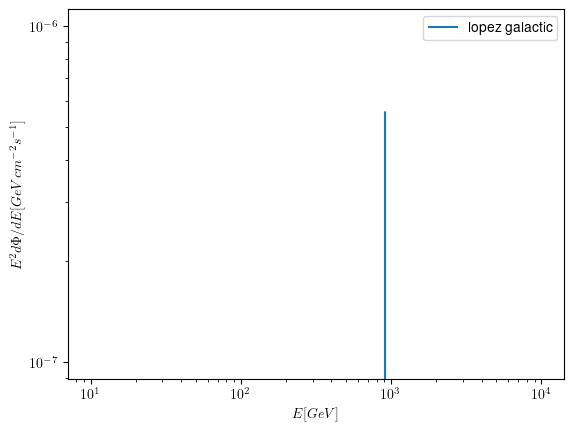

In [52]:
sv=1e-25
m_x=1000
E_log_grid=np.logspace(1, 4, 50)

plt.plot(E_log_grid,galactic_flux(E_log_grid,m_x,sv)*(E_log_grid**2),label='lopez galactic')
plt.xlabel('$E[GeV]$')
plt.ylabel(r'$E^2 d\Phi/dE [GeV cm^{-2} s^{-1}]$')
plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e-5,1e15])
#plt.ylim([0, 0.5e8])
plt.legend()

In [53]:
def profile_function(r):
    #r[cm],rho[GeV/cm^3]
    r_0=(20*3.086e21)
    rho_0=3
    return (4*np.pi*r**2) * rho_0*(r/(r_0))**(-1.5)*(1+(r/(r_0)))**(-2)
profile_int=integrate.quad(profile_function,1,100*3.086e21)[0]
print(profile_int)

6.8921732203183104e+69


In [54]:
#test only NGC1068 contribution
def dPhidE_extra_single():   
    sv=1e-25
    prefactor = 1/(4*np.pi) *sv *(1/3)* (omega_dm * rho_c) ** 2 
    
    profile_int= 6.8921732203183104e+69 #in gram,use 10^12 solar mass as galaxy mass
    dndM_int=1/ (np.pi*(14.4e3*3.086e21)*(100*3.086e21)**2/3) #in 1/cm^3, use R_gal=50kpc, d=14.4Mpc
    G_prefactor=profile_int*dndM_int
    
    G= lambda z: (1 + (G_prefactor/(omega_dm * rho_c)**2)*(1/(1+z)**6))*(1+z)**3/H_z(z)
    
    dPhidE_int = integrate.quad(G, 0, 0.0037)
    
    return dPhidE_int[0]*prefactor

In [55]:
dPhidE_extra_single()

6.68712570488552e-15

In [56]:
import pickle as pkl

In [57]:
test = pkl.load(open('fluxes/Extra_galactic/tau/z_5/nfw_1e2.pkl', 'rb'))

In [58]:
egrid = pkl.load(open('fluxes/e_grid_mceq.pkl', 'rb'))
tau_1e2 = pkl.load(open('fluxes/Galactic/tau/nfw_1e2.pkl', 'rb'))
tau_1e3 = pkl.load(open('fluxes/Galactic/tau/nfw_1e3.pkl', 'rb'))
tau_1e4 = pkl.load(open('fluxes/Galactic/tau/nfw_1e4.pkl', 'rb'))
tau_1e5 = pkl.load(open('fluxes/Galactic/tau/nfw_1e5.pkl', 'rb'))
tau_1e6 = pkl.load(open('fluxes/Galactic/tau/nfw_1e6.pkl', 'rb'))

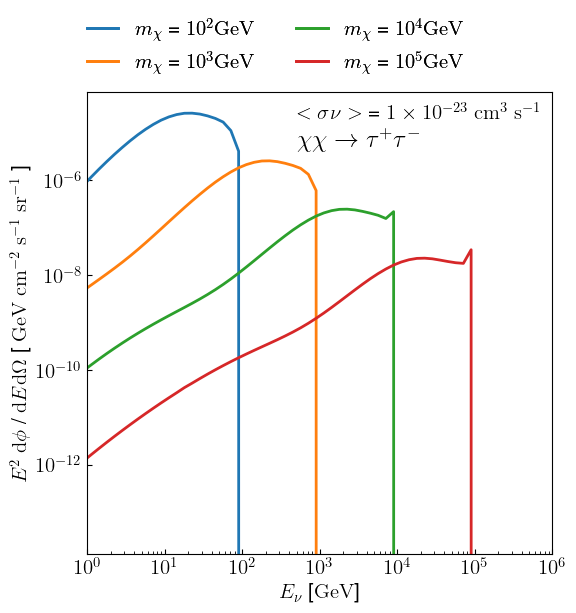

In [59]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
ax1.plot(egrid, egrid**2 * tau_1e2, label=r'$m_\chi$ = $10^2 \textrm{GeV}$',lw=2)
ax1.plot(egrid, egrid**2 * tau_1e3, label=r'$m_\chi$ = $10^3 \textrm{GeV}$',lw=2)
ax1.plot(egrid, egrid**2 * tau_1e4, label=r'$m_\chi$ = $10^4 \textrm{GeV}$',lw=2)
ax1.plot(egrid, egrid**2 * tau_1e5, label=r'$m_\chi$ = $10^5 \textrm{GeV}$',lw=2)
#ax1.plot(egrid, tau_1e6, label=r'$m_\chi$ = $10^6 \textrm{GeV}$',lw=2)
ax1.set_xscale('log')
ax1.set_yscale('log')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.85, +1.1),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(1e0, 1e6)
ax1.text(5e2, 5e-6, r'$\chi\chi \rightarrow \tau^{+}\tau^{-}$', fontsize=fontsize+3)
ax1.text(5e2, 2e-5, r'$<\sigma \nu>$ = $1\times 10^{-23}$ $\textrm{cm}^{3}$ $\textrm{s}^{-1}$', fontsize=fontsize)
ax1.set_xlabel(r'$E_\nu$   [$\textrm{GeV}$]', fontsize=fontsize)
ax1.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$  [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
figure.savefig("Final_flux_gal"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [60]:
tau_5z_extra = pkl.load(open('fluxes/Extra_galactic/tau/z_5/nfw_1e4.pkl', 'rb'))
tau_50z_extra = pkl.load(open('fluxes/Extra_galactic/tau/z_50/nfw_1e4.pkl', 'rb'))
tau_500z_extra = pkl.load(open('fluxes/Extra_galactic/tau/z_500/nfw_1e4.pkl', 'rb'))
tau_5e3z_extra = pkl.load(open('fluxes/Extra_galactic/tau/z_5e3/nfw_1e4.pkl', 'rb'))
tau_5e4z_extra = pkl.load(open('fluxes/Extra_galactic/tau/z_5e4/nfw_1e4.pkl', 'rb'))
tau_5e5z_extra = pkl.load(open('fluxes/Extra_galactic/tau/z_5e5/nfw_1e4.pkl', 'rb'))
tau_5e7z_extra = pkl.load(open('fluxes/Extra_galactic/tau/z_5e7/nfw_1e4.pkl', 'rb'))
# picture path


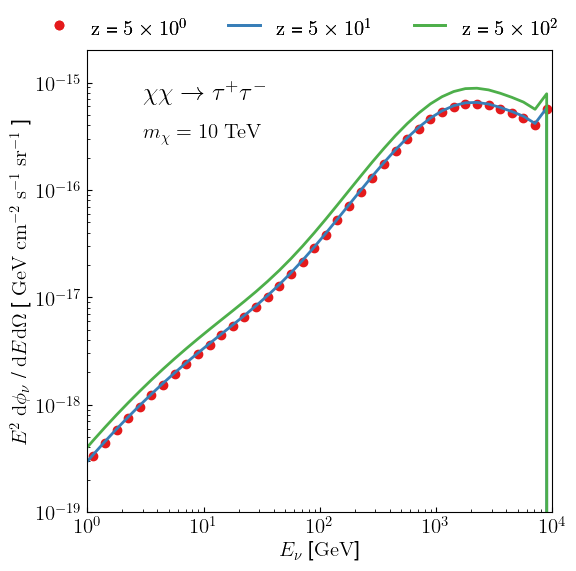

In [68]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
ax1.plot(egrid, egrid**2 * tau_5z_extra, 'o', color='#e41a1c', label=r'$\textrm{z}$ = $5\times 10^0$', lw=2)
ax1.plot(egrid, egrid**2 * tau_50z_extra,     color='#377eb8', label=r'$\textrm{z}$ = $5\times 10^1$', lw=2)
ax1.plot(egrid, egrid**2 * tau_500z_extra,    color='#4daf4a', label=r'$\textrm{z}$ = $5\times 10^2$', lw=2)
#ax1.plot(egrid, egrid**2 * tau_5e3z_extra,    color='#984ea3',label=r'$z = 5\times 10^3$', lw=2)
#ax1.plot(egrid, egrid**2 * tau_5e4z_extra,    color='#ff7f00',label=r'$z = 5\times 10^4$', lw=2)
#ax1.plot(egrid, egrid**2 * tau_5e5z_extra,    color='#7570b3',label=r'$z = 5\times 10^5$', lw=2)
#ax1.plot(egrid, egrid**2 * tau_5e7z_extra,    color='#a65628',label=r'$z = 5\times 10^7$', lw=2)
ax1.set_xscale('log')
ax1.set_yscale('log')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.051, +1.05),
                 ncol=3, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(1e0, 1e4)
ax1.set_ylim(1e-19,2e-15)
ax1.text(3, 7e-16, r'$\chi\chi \rightarrow \tau^{+}\tau^{-}$', fontsize=fontsize+3)
ax1.text(3, 3e-16, r'$m_\chi =  10$ $\textrm{TeV}$', fontsize=fontsize)
ax1.set_xlabel(r'$E_\nu$   [$\textrm{GeV}$]', fontsize=fontsize)
ax1.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi_{\nu}$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$  [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
figure.savefig("Final_flux"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [62]:
icecube = np.loadtxt('icecube_tau.csv', delimiter=',')
km3net = np.loadtxt('km3net.csv', delimiter=',')

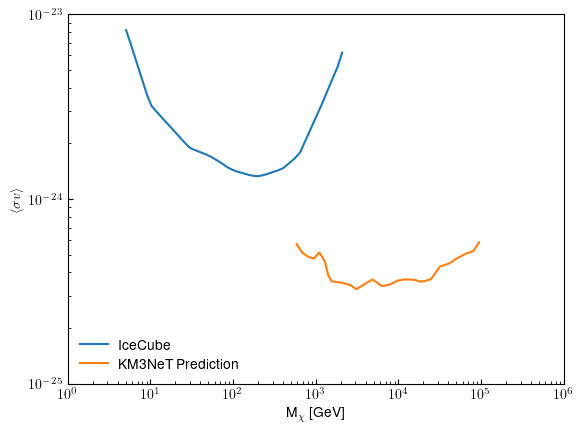

In [63]:
new_calc = np.array([[500., 10**(-25.4)], [1e3, 10**(-25.5)], [1e4, 10**(-25.3)], [10**4.5, 10**(-25.3)], [1e5, 10**(-24.7)], [1e6, 10**(-24.0)]])
plt.plot(icecube[:, 0][:-10], icecube[:, 1][:-10], label=r'IceCube')
plt.plot(km3net[:, 0], km3net[:, 1], label=r'KM3NeT Prediction')
# plt.plot(icecube[:, 0][:-10], icecube[:, 1][:-10] / 1.6, label=r'IceCube Scaling$\circ$')
# plt.plot(new_calc[:, 0], new_calc[:, 1] * 10**(-24.) / 10**(-25.5), label=r'IceCube Diffuse Scaling$\circ$')
# plt.plot(new_calc[:, 0], new_calc[:, 1] * 10**(-24.) / 10**(-25.5) / np.sqrt(20. * 2.), label=r'P-ONE Diffuse Scaling$\circ$')
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, loc='lower left')
plt.xlim(1e0, 1e6)
plt.ylim(1e-25, 1e-23)
plt.xlabel(r'M$_\chi$ [GeV]')
plt.ylabel(r"$\langle \sigma v\rangle$")
plt.tick_params(axis="both", which='major',direction="in")
plt.tick_params(axis="both", which='minor',direction="in")
plt.savefig('Limits_Org', dpi=250)

In [64]:
np.sin(np.deg2rad(-30))

-0.49999999999999994

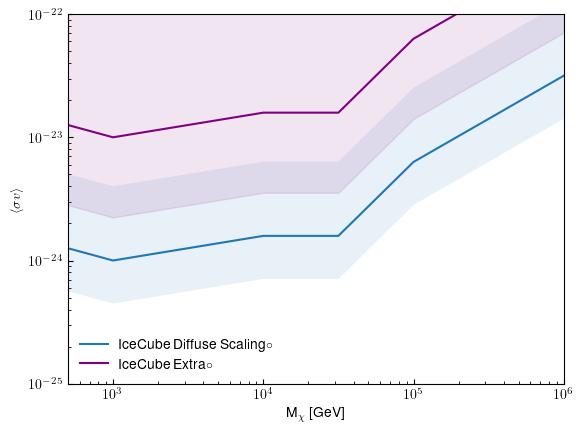

In [65]:
new_calc = np.array([[500., 10**(-25.4)], [1e3, 10**(-25.5)], [1e4, 10**(-25.3)], [10**4.5, 10**(-25.3)], [1e5, 10**(-24.7)], [1e6, 10**(-24.0)]])
# plt.plot(icecube[:, 0][:-10], icecube[:, 1][:-10], label=r'IceCube')
# plt.plot(icecube[:, 0][:-10], icecube[:, 1][:-10] / 1.6, label=r'IceCube Scaling$\circ$')
plt.fill_between(
    new_calc[:, 0],
    new_calc[:, 1] * 10**(-24.) / 10**(-25.5) * 4,
    new_calc[:, 1] * 10**(-24.) / 10**(-25.5) / np.sqrt(5),
    alpha=0.1
)
plt.plot(new_calc[:, 0], new_calc[:, 1] * 10**(-24.) / 10**(-25.5), label=r'IceCube Diffuse Scaling$\circ$')
plt.plot(
    new_calc[:, 0],
    new_calc[:, 1] * 10**(-24.) / 10**(-25.5) * 10,
    label=r'IceCube Extra$\circ$', alpha=1., color='purple')
plt.fill_between(
    new_calc[:, 0],
    new_calc[:, 1] * 10**(-24.) / 10**(-25.5) * 10 * 4 * 5,
    new_calc[:, 1] * 10**(-24.) / 10**(-25.5) * 10 / np.sqrt(5) / np.sqrt(4),
    alpha=0.1, color='purple')
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, loc='lower left')
plt.xlim(500, 1e6)
plt.ylim(1e-25, 1e-22)
plt.xlabel(r'M$_\chi$ [GeV]')
plt.ylabel(r"$\langle \sigma v\rangle$")
plt.tick_params(axis="both", which='major',direction="in")
plt.tick_params(axis="both", which='minor',direction="in")
plt.savefig('Extra_Lim_Discussion', dpi=250)